Intercept (β₀): -1.48
Coefficient (β₁): 0.04
Logistic equation: P(pass) = 1 / (1 + e^-(-1.48 + 0.04 × x ))
Decision boundary: 55.47 minutes  


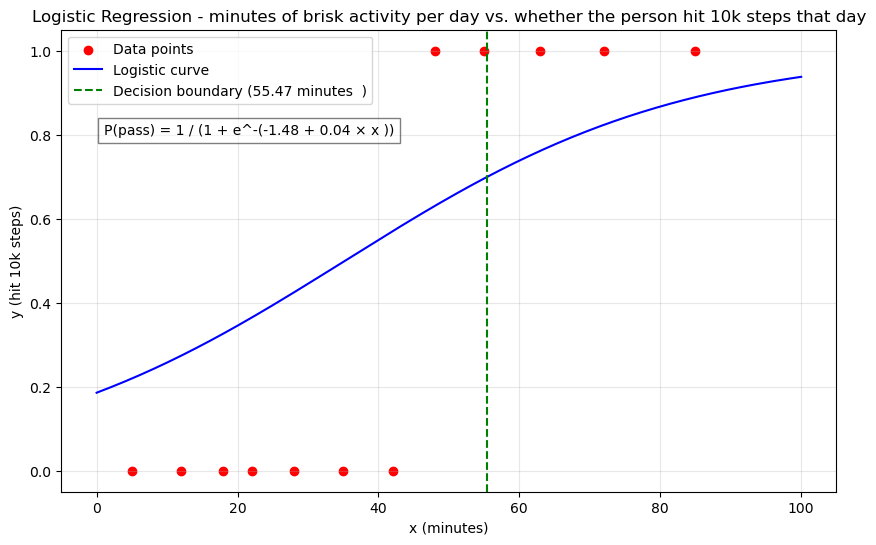


Predictions:
16 minutes: 0.31 probability to hit 10k steps that day (Fail)
27 minutes: 0.41 probability to hit 10k steps that day (Fail)
33 minutes: 0.48 probability to hit 10k steps that day (Fail)
49 minutes: 0.64 probability to hit 10k steps that day (Pass)
67 minutes: 0.79 probability to hit 10k steps that day (Pass)
90 minutes: 0.91 probability to hit 10k steps that day (Pass)
Confusion Matrix:
[[1 0]
 [1 2]]


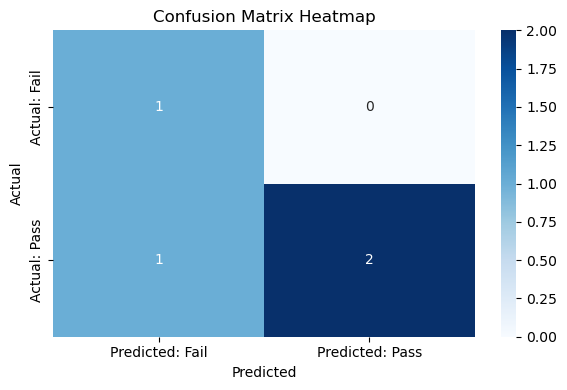


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

evaluation metrics:
Accuracy:  0.75
Recall:    0.67
Precision: 1.00
F1 Score:  0.80


In [24]:
#Exercise 1 — Binary Logistic Regression (single feature)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from math import log
#x is the minutes of brisk activity per day
# y is whether the person hit 10k steps that day
x = np.array([ 5,12,18,22,28,35,42,48,55,63,72,85 ]).reshape(-1,1)
y = np.array([ 0,0,0,0,0,0,0,1,1,1,1,1 ])

# Create logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(x, y)

# Coefficients
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

# Print results
print(f"Intercept (β₀): {model.intercept_[0]:.2f}")
print(f"Coefficient (β₁): {model.coef_[0][0]:.2f}")

# Calculate equation
equation = f"P(pass) = 1 / (1 + e^-({model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f} × x ))"
print(f"Logistic equation: {equation}")

# get boundary for any probability
def get_threshold(probability):
    logit = log(probability / (1 - probability))
    return (logit - b0) / b1

# Find decision boundary
decision_boundary = get_threshold(0.70)

print(f"Decision boundary: {decision_boundary:.2f} minutes  ")

# Generate points for the logistic curve
x_test = np.linspace(0, 100,200).reshape(-1, 1)
y_proba = model.predict_proba(x_test)[:, 1]

# Create the graph
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', marker='o', label='Data points')
plt.plot(x_test, y_proba, color='blue', label='Logistic curve')
plt.axvline(x=decision_boundary, color='green', linestyle='--', label=f'Decision boundary ({decision_boundary:.2f} minutes  )')

# Add labels and formatting
plt.title('Logistic Regression - minutes of brisk activity per day vs. whether the person hit 10k steps that day')
plt.xlabel('x (minutes)')
plt.ylabel('y (hit 10k steps)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.text(1, 0.8, equation, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.ylim(-0.05, 1.05)
plt.show()

# Make predictions for specific study hours
print("\nPredictions:")
for minutes in [16, 27, 33, 49, 67, 90]:
    probability = 1 / (1 + np.exp(-(model.intercept_[0] + model.coef_[0][0] * minutes)))
    outcome = "Pass" if probability >= 0.5 else "Fail"
    print(f"{minutes} minutes: {probability:.2f} probability to hit 10k steps that day ({outcome})")

#Bonus — Model Evaluation
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# Predict the test set
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", \
            xticklabels=["Predicted: Fail", "Predicted: Pass"], yticklabels=["Actual: Fail", "Actual: Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("evaluation metrics:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score:  {f1:.2f}")


In [40]:
#Exercise 2 — Logistic Regression with Two Features (multi-binary)
import numpy as np
from sklearn.linear_model import LogisticRegression

#1:Fit a logistic regression with solver='liblinear' using features [x1, x2]
# Dataset
x1 = np.array([2, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 10])
x2 = np.array([5.0, 5.5, 5.0, 6.0, 5.5, 6.5, 6.0, 7.0, 6.5, 7.5, 6.0, 7.0, 7.0, 7.5])
y  = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Combine features
X = np.column_stack((x1, x2))

# Create logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X, y)

#2:Print intercept_ and all entries of coef_ (there should be one row with two values: [β1, β2])
# Print intercept and coefficients
print(f"Intercept (β₀): {model.intercept_[0]:.2f}")
print(f"Coefficients (β1, β2): {model.coef_[0]}")

#3:*Bonus: Write the regression equation
# Logistic regression equation
equation = f"P(pass) = 1 / (1 + exp(-({model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f}*x1 + {model.coef_[0][1]:.2f}*x2)))"
print(f"Logistic equation: {equation}")

#4:Compute the predicted probability for the point [x1, x2] = [6.5, 7.5]
# Compute predicted probability for [x1=6.5, x2=7.5]
point = np.array([[6.5, 7.5]])
prob = model.predict_proba(point)[0, 1]
print(f"\nPredicted probability for x1=6.5, x2=7.5: {prob:.2f}")


Intercept (β₀): -0.44
Coefficients (β1, β2): [ 1.11339329 -0.86999793]
Logistic equation: P(pass) = 1 / (1 + exp(-(-0.44 + 1.11*x1 + -0.87*x2)))

Predicted probability for x1=6.5, x2=7.5: 0.57
